In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

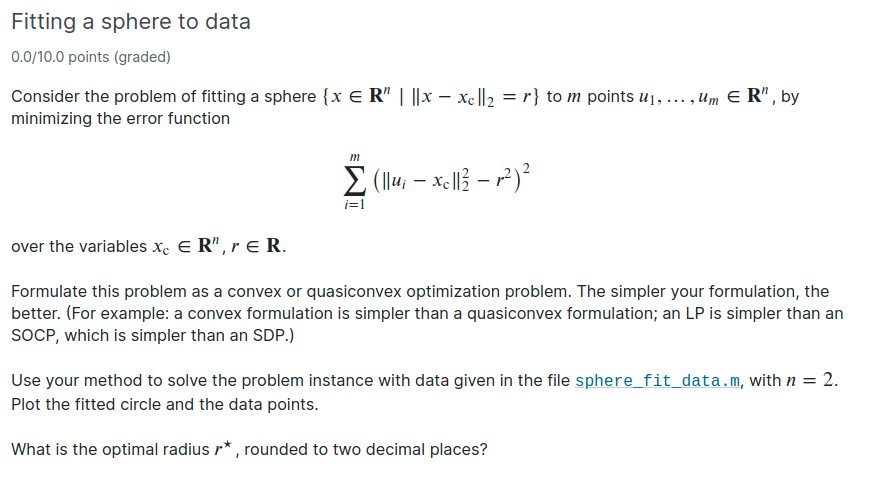

# Formulation


minimize $\sum{[u_i^T u_i -2u_i^T x_c + x_c^T x_c - r^2]^2}$

using: $z = x_c^T x_c - r^2$

minimize $\sum{(u_i^T u_i -2u_i^T x_c + z)^2} = \lVert A[x_c,z] - b\rVert^2$

It's least squares!

But we need : $r^2 \geq 0 \implies  x_c^T x_c - z \geq 0$

Can we assure this always happens at optimal point?

$x_* = (A^T A)^{-1} A^T b$

# Problem data

In [2]:
U = [
  [-3.8355737e+00 ,  5.9061250e+00],
  [-3.2269177e+00 ,  7.5112709e+00],
  [-1.6572955e+00 ,  7.4704730e+00],
  [-2.8202585e+00 ,  7.7378120e+00],
  [-1.7831869e+00 ,  5.4818448e+00],
  [-2.1605783e+00 ,  7.7231450e+00],
  [-2.0960803e+00 ,  7.7072529e+00],
  [-1.3866295e+00 ,  6.1452654e+00],
  [-3.2077849e+00 ,  7.6023307e+00],
  [-2.0095986e+00 ,  7.6382459e+00],
  [-2.0965432e+00 ,  5.2421510e+00],
  [-2.8128775e+00 ,  5.1622157e+00],
  [-3.6501826e+00 ,  7.2585500e+00],
  [-2.1638414e+00 ,  7.6899057e+00],
  [-1.7274710e+00 ,  5.4564872e+00],
  [-1.5743230e+00 ,  7.3510769e+00],
  [-1.3761806e+00 ,  6.9730981e+00],
  [-1.3602495e+00 ,  6.9056362e+00],
  [-1.5257654e+00 ,  5.7518622e+00],
  [-1.9231176e+00 ,  7.6775030e+00],
  [-2.9296195e+00 ,  7.7561481e+00],
  [-3.2828270e+00 ,  5.4188036e+00],
  [-2.9078414e+00 ,  5.1741322e+00],
  [-3.5423007e+00 ,  5.5660735e+00],
  [-3.1388035e+00 ,  7.7008514e+00],
  [-1.7957226e+00 ,  5.4273243e+00],
  [-2.6267585e+00 ,  7.7336173e+00],
  [-3.6652627e+00 ,  7.2686635e+00],
  [-3.7394118e+00 ,  6.0293335e+00],
  [-3.7898021e+00 ,  5.9057623e+00],
  [-3.6200108e+00 ,  5.7754097e+00],
  [-3.0386294e+00 ,  5.3028798e+00],
  [-2.0320023e+00 ,  5.2594588e+00],
  [-2.9577808e+00 ,  5.3040353e+00],
  [-2.9146706e+00 ,  7.7731243e+00],
  [-3.2243786e+00 ,  5.4402982e+00],
  [-2.1781976e+00 ,  7.7681141e+00],
  [-2.2545150e+00 ,  5.2233652e+00],
  [-1.2559218e+00 ,  6.2741755e+00],
  [-1.8875105e+00 ,  5.4133273e+00],
  [-3.6122685e+00 ,  7.2743342e+00],
  [-2.6552417e+00 ,  7.7564498e+00],
  [-1.4127560e+00 ,  6.0732284e+00],
  [-3.7475311e+00 ,  7.2351834e+00],
  [-2.1367633e+00 ,  7.6955709e+00],
  [-3.9263527e+00 ,  6.2241593e+00],
  [-2.3118969e+00 ,  7.7636052e+00],
  [-1.4249518e+00 ,  7.1457752e+00],
  [-2.0196394e+00 ,  5.3154475e+00],
  [-1.4021445e+00 ,  5.9675466e+00],
]
U = np.array(U)
A = np.concatenate((-2*U , np.ones((U.shape[0],1))), axis = 1)
b = -np.sum(U * U , axis = 1, keepdims = True)
print("A shape:", A.shape)
print("b shape:", b.shape)

A shape: (50, 3)
b shape: (50, 1)


# Solving

In [3]:
x = cp.Variable((A.shape[1], 1))
obj = cp.Minimize(cp.sum_squares(A @ x - b))
prob = cp.Problem(obj)
prob.solve()
assert prob.status == cp.OPTIMAL

x_c = x.value[:-1]
z = x.value[-1]
r2 = x_c.T @ x_c - z

assert  r2 >= 0

r = r2**0.5
print('x_c:\n', x_c)
print('r:\n', r)

x_c:
 [[-2.58690471]
 [ 6.48834954]]
r:
 [[1.30522648]]


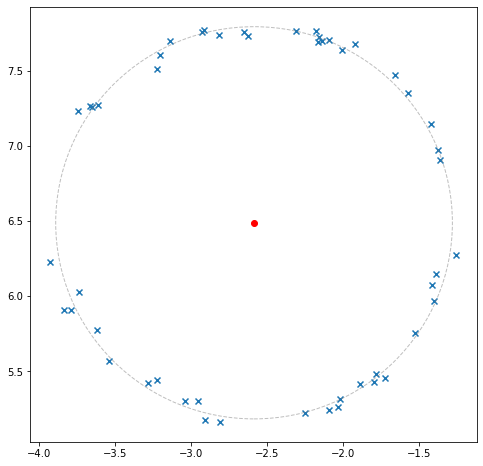

In [4]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(U[:,0], U[:,1], marker = 'x')
ax.scatter(x_c[0],x_c[1], c = 'r')
circle = Circle(x_c, r , facecolor='none', edgecolor='gray', linewidth=1, ls = '--', alpha=0.5)
ax.add_patch(circle)
plt.show()